In [1]:
##############################
##         IMPORTS          ##
##############################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score as score
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
from sklearn.linear_model import BayesianRidge


In [2]:
housing = fetch_california_housing()

housing_data = pd.DataFrame(housing.data, columns=housing.feature_names)

housing_data['target'] = housing.target

In [3]:
X = housing_data.drop(columns=['MedInc', 'target'])
#X = np.asarray(housing_data['MedInc']).reshape(-1,1)
y = np.asarray(housing_data['target'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [4]:
ridge = BayesianRidge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

err = MSE(y_pred, y_test)
print("RMSE:", np.sqrt(err))
print('CHOSEN ALPHA:', ridge.alpha_)

RMSE: 0.8790971240757379
CHOSEN ALPHA: 1.2397357046101112


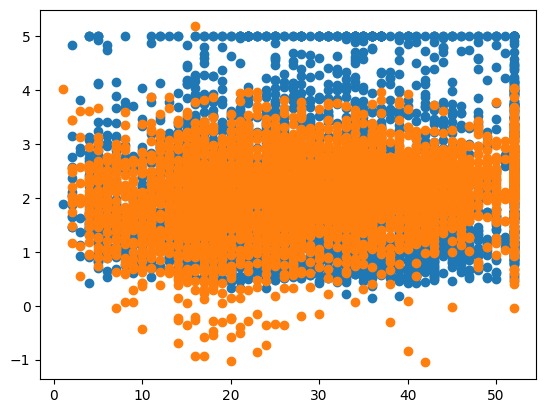

In [5]:
X_test = np.asarray(X_test)
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0],y_pred)